In [23]:
#드라이브 불러오기 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#데이터 불러오기
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Display_Sensor_Anomaly_Analysis/fact_data_vif.csv",index_col='dat...date.name.')
data
y_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Display_Sensor_Anomaly_Analysis/factory_glass_2016.csv",encoding='cp949',index_col='dat...date.name.')
y_data

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,X1WOS45105_PV,...,S_C1_C2_L_L,S_C1_C2_L_R,S_C2_C3_U_L,S_C2_C3_U_R,S_C2_C3_L_L,S_C2_C3_L_R,S_C3_C4_U_L,S_C3_C4_U_R,S_C3_C4_L_L,S_C3_C4_L_R,S_AB1_AB11_L,S_AB1_AB11_R,S_AB11_AB7_L,S_AB11_AB7_R,S_AB7_C4_L,S_AB7_C4_R,S_C4_RET_L,S_C4_RET_R,S_RET_F_L,S_RET_F_R,STD_U_L,STD_U_R,STD_L_L,STD_L_R,STD_GLS_L,STD_GLS_R,투입.LEFT.,투입.RIGHT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 07,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,-1.804912,...,-0.195736,0.706941,1.477203,0.410847,0.491620,0.942180,2.776941,2.492437,2.060406,2.612283,1.726404,1.461145,-1.192642,-1.134471,2.599429,2.690433,-0.365598,-0.659319,-1.963403,-1.621407,0.523950,1.951349,2.248106,2.767676,3.012706,3.069007,80,74,2,5,8,3,11.69,8.75,14.86,11.69,0.025,0.063,0.108,0.041
2016-01-01 08,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,-1.804912,...,-0.500742,0.822657,1.495204,0.397591,0.587871,0.938186,2.888919,2.573187,2.161149,2.664726,1.682081,1.414518,-1.109125,-1.042269,2.588703,2.654307,-0.348979,-0.560103,-1.978936,-1.810022,0.566521,2.010125,2.364418,2.842630,3.022998,3.069274,92,75,0,2,10,0,7.19,2.17,13.33,7.19,0.000,0.022,0.133,0.000
2016-01-01 09,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,-1.804912,...,-0.164556,0.962210,1.552127,0.460702,0.397216,0.843443,2.868644,2.486441,2.183298,2.638130,1.632955,1.359022,-0.986580,-0.928583,2.550175,2.606185,-0.456071,-0.644073,-1.878611,-1.742395,0.545936,2.002820,2.397034,2.817728,2.936967,2.969952,64,66,1,4,0,0,3.85,7.81,0.00,3.85,0.016,0.063,0.000,0.000
2016-01-01 10,-1.

In [25]:
#다른곳에 있는 레이블 합치기 
import numpy as np
data['L.RD'] = y_data["L.RD"]
pd.DataFrame(data)

data

,X1WOS45106_PV,X1WOS45107_PV,X1WOS45109_PV,DCS_Offset_RPM_M11.1WOS45111_PV,DCS_Offset_RPM_M15.1WOS45115_PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,Gross.width,Left.edge,LOWER.AB7.Z92.TMP.1TIC41751.PV,UPPER.C2..Z175.TMP.1TIC42307.PV,LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV,LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV,LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV,LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV,LEHR.DRV.MTR..M7.1.CUR.1WII40110.PV,LEHR.DRV.MTR..M7.2.CUR.1WII40111.PV,LEHR.DRV.MTR..M8.1.CUR.1WII40112.PV,LEHR.DRV.MTR..M8.2.CUR.1WII40113.PV,LEHR.DRV.MTR..M10.2.CUR.1WII40117.PV,LEHR.DRV.MTR..M11.1.CUR.1WII40118.PV,LEHR.DRV.MTR..M12.1.CUR.1WII40120.PV,LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV,LEHR.DRV.MTR..M15.1.CUR.1WII40126.PV,LEHR.DRV.MTR..M16.1.CUR.1WII40128.PV,LEHR.DRV.MTR..M16.2.CUR.1WII40129.PV,LEHR.DRV.MTR..M17.1.CUR.1WII40130.PV,LEHR.DRV.MTR..M18.1.CUR.1WII40132.PV,LEHR.DRV.MTR..M18.2.CUR.1WII40133.PV,LEHR.DRV.MTR..M19.1.CUR.1WII40134.PV,X1WOS45102_PV.1,X1WOS45106_PV.1,DCS_Offset_RPM_M11.1WOS45111_PV.1,DCS_Offset_RPM_M14.1WOS45114_PV.1,TMP.TIN..BAY.1.LEFT.1TI30201.PV,...,D_AB3_R_UL,D_AB4_R_UL,D_AB5_R_UL,D_AB7_L_UL,D_AB8_L_UL,D_AB9_R_UL,D_C1_U_LR,D_C3_U_LR,D_C4_U_LR,D_C4_L_LR,D_C1_R_UL,D_C2_L_UL,D_C2_R_UL,D_GLS_AB11_LR,D_GLS_AB7_LR,D_GLS_F_LR,D_GLS_RET_LR,S_AB1_AB2_U_L,S_AB1_AB2_U_R,S_AB2_AB3_U_L,S_AB3_AB4_L_R,S_AB4_AB5_U_L,S_AB5_AB6_L_R,S_AB6_AB7_U_R,S_AB6_AB7_L_L,S_AB7_AB8_L_R,S_AB8_AB9_U_L,S_AB9_AB10_U_L,S_AB10_AB11_L_L,S_C1_C2_L_L,S_C2_C3_U_R,S_C3_C4_U_L,투입.LEFT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,L.RD
dat...date.name.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 07,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.027949,2.433864,1.290385,-1.994935,2.803512,2.180684,-0.011076,0.07524,0.01758,-0.02383,5.289937,-0.237516,-4.384738,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,-0.133738,0.011076,1.531614,-0.911596,5.486833,5.271747,6.241618,0.054335,...,-0.150324,2.253434,0.601696,-0.414553,2.262545,2.569220,1.014661,1.935018,0.878525,1.400976,-0.064030,1.264824,-1.277446,-0.331785,-0.336811,0.392527,-1.204339,0.022728,-0.469574,-1.047496,0.848992,0.040088,-1.344386,-0.031034,-2.477830,-0.274508,1.012915,-0.398517,-1.277785,-0.195736,0.410847,2.776941,80.0,2.0,5.0,8.0,3.0,8.75,14.86,0.025
2016-01-01 08,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.053693,2.392478,1.189370,-2.011604,2.808048,1.598043,-0.011076,0.07524,0.01758,-0.02383,4.508077,-0.237516,-4.384738,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,-0.133738,0.011076,1.531614,-1.570853,-0.098112,0.015846,-0.080082,0.049592,...,-0.127329,2.176112,0.616603,-0.302930,2.162538,2.637114,0.978115,1.945713,0.765455,1.269891,0.017947,1.253210,-1.084720,-0.201602,-0.023749,0.643118,-0.700142,-0.021609,-0.500026,-1.063102,0.834203,0.030658,-1.294084,-0.056337,-2.508000,-0.797190,1.043599,-0.367705,-1.201661,-0.500742,0.397591,2.888919,92.0,0.0,2.0,10.0,0.0,2.17,13.33,0.000
2016-01-01 09,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.079437,2.433864,1.041403,-2.104412,1.921064,1.598020,-0.011076,0.07524,0.01758,-0.02383,5.371871,-0.237516,-4.384738,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,2.421443,0.011076,1.531614,-1.570853,-0.098112,0.015846,-0.080082,0.062471,...,-0.070542,2.215808,0.583456,-0.312238,2.205827,2.703989,1.060357,1.989144,0.648465,1.058985,-0.038719,1.517443,-1.023893,-0.001965,0.231003,0.893808,-0.499177,-0.014772,-0.520993,-1.116769,0.812830,0.146174,-1.216127,-0.149875,-2.538873,-1.089624,1.008563,-0.393200

In [26]:
#합친 y레이블 테스트, 트레인 데이터로 나누기
from sklearn.model_selection import train_test_split 
X =pd.DataFrame(data)
y = pd.DataFrame(data["L.RD"])
X_train, X_test, y_train, y_test = train_test_split(X, y)

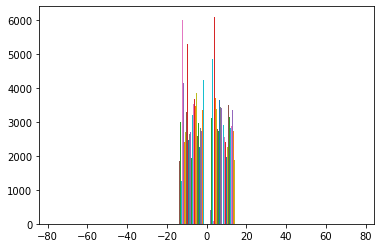

In [27]:
#StandardScaler로 정규화시키기 
#그래프로 본 결과 -20과 20사이에있음
#StandardScaler()
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaler.fit(X_train)
data_scaled_second= scaler.transform(X_train)

plt.hist(data_scaled_second)
plt.show()


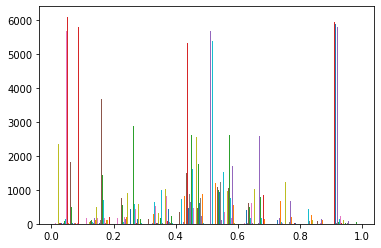

In [28]:
#MinMaxScaler()로 정규화 시키기 
#그래프로 본 결과 고루 정규화 되어있음
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X_train)
x_train_norm = scaler.transform(X_train)

import matplotlib.pyplot as plt


plt.hist(x_train_norm)
plt.show()



PCA(Principal Component Analysis )

In [29]:
from sklearn.decomposition import PCA

d = np.argmax(cumsum >= 0.95)+1 # 주성분 숫자 결정체
print(d)

55


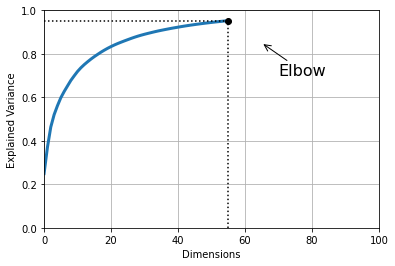

NameError: ignored

In [30]:
#주성분 숫자 결정 엘보로 확인하기
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4)) 
plt.plot(cumsum, linewidth=3) 
plt.axis([0, 100, 0, 1])
plt.xlabel("Dimensions") 
plt.ylabel("Explained Variance") 
plt.plot([d, d], [0, 0.95], "k:") 
plt.plot([0, d], [0.95, 0.95], "k:") 
plt.plot(d, 0.95, "ko") 
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=16) 
plt.grid(True) 
plt.show()
save_fig("explained_variance_plot")


In [32]:
pca = PCA(n_components=55) # 주성분 숫자 결정
X_reduced = pca.fit_transform(x_train_norm) 
print("차원의 개수:", pca.n_components_) 
print("분산의 비율:", np.sum(pca.explained_variance_ratio_))

차원의 개수: 55
분산의 비율: 0.9511838743344838


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=55) # 주성분 숫자 결정
printcipalComponents = pca.fit_transform(x_train_norm)
principalDf = pd.DataFrame(data=printcipalComponents)
principalDf 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0.639898,-0.229530,-0.890492,0.237498,0.289831,-0.104502,-0.225488,-0.009863,0.071333,-0.053867,0.068599,-0.139438,0.060634,0.006547,-0.174286,-0.223166,-0.237705,0.146204,0.108385,-0.054082,-0.006634,0.025883,0.015849,-0.004079,0.097047,0.090754,-0.132176,-0.101230,0.072560,0.034651,0.011536,0.062466,-0.054435,0.003655,0.100893,-0.023181,-0.086243,0.080133,-0.047433,-0.059039,0.102326,0.085922,0.029770,0.032682,0.023600,0.037674,0.019959,-0.001461,-0.017930,-0.031437,-0.012926,0.043993,-0.051254,0.019858,0.017600
1,0.676880,-0.187146,-0.990824,0.212323,0.145742,-0.238769,0.054200,-0.234920,0.077099,0.174354,-0.051494,0.125997,0.075925,-0.338747,-0.096499,-0.056741,-0.196326,-0.107295,-0.004244,0.039009,-0.125246,0.002137,0.215437,-0.113271,-0.225989,0.088209,-0.029395,0.001984,-0.057097,0.084248,-0.013753,0.126597,0.019870,-0.202902,-0.125862,0.000821,-0.086373,-0.113242,0.109276,-0.067798,0.052863,0.071334,-0.171408,0.162100,0.102253,0.012706,0.050069,0.014345,0.057704,0.019407,0.041795,-0.058356,0.103710,-0.070337,-0.042528
2,1.986602,-0.410719,1.551696,1.164479,-0.025930,-0.064567,0.035787,-0.306562,-0.042490,-0.244151,-0.081979,-0.350268,-0.034642,-0.067379,-0.181203,-0.082215,-0.199452,0.037887,0.004711,0.069586,0.045000,-0.108609,0.208383,-0.068116,-0.066094,-0.021172,0.020838,-0.124819,-0.113399,-0.142285,-0.140111,-0.163947,-0.032132,-0.131572,0.120088,0.112892,-0.081281,-0.138133,-0.131863,-0.281462,-0.210925,-0.110388,-0.127704,-0.029260,0.072269,0.032182,0.037154,-0.135494,0.085573,-0.082867,-0.026265,0.125795,-0.025985,0.127840,-0.164227
3,-0.955535,-0.399652,0.267703,-0.185335,-0.303254,0.071554,0.274227,-0.101203,-0.173742,-0.353984,0.239455,0.190571,0.021230,-0.060862,-0.268509,0.291075,-0.040433,0.160440,-0.004867,-0.068368,0.119980,-0.049714,0.072418,-0.115576,-0.076710,0.084034,-0.020146,-0.156790,-0.013854,0.175902,0.149630,-0.056075,0.012027,-0.004336,0.083596,-0.110005,0.204216,0.052772,-0.087848,-0.051252,0.107880,-0.010091,0.061516,0.063407,0.083103,-0.076002,0.063662,0.115373,0.082834,0.011202,0.061541,0.040106,-0.047067,-0.035005,0.060773
4,0.317425,-0.231008,-0.885680,0.280251,0.341451,-0.012267,-0.160929,0.039949,0.274218,-0.097237,0.021696,-0.085801,-0.037193,0.144259,-0.102016,-0.221317,-0.213262,-0.047432,0.019411,-0.081578,-0.029981,-0.058473,0.037000,-0.052821,0.046651,0.029365,-0.068516,0.070549,0.070684,-0.031818,-0.046864,0.000189,-0.063163,0.159877,0.001155,-0.059702,-0.010050,0.061197,-0.084689,-0.044450,0.027026,0.032153,0.111429,0.024551,0.044504,0.061251,0.005776,-0.010250,0.053938,-0.003479,-0.053924,0.002284,-0.108531,0.030375,0.029474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,1.087475,-0.019762,-0.308731,-0.474395,-0.309759,-0.191040,0.234334,0.128961,-0.429078,-0.014596,-0.175526,-0.133738,-0.460950,0.570867,-0.078637,0.244883,-0.160750,-0.171575,0.443766,-0.003924,-0.083187,0.381487,0.005212,0.286221,-0.059748,-0.199522,0.046564,0.153440,0.211770,0.124548,0.025742,-0.127190,-0.073415,0.057920,-0.101393,-0.107759,0.003274,-0.074484,-0.049907,-0.083478,-0.029974,-0.013576,-0.047888,-0.009868,-0.005804,0.078655,-0.032408,-0.066439,-0.058920,-0.005845,0.032742,-0.024927,-0.011084,-0.103746,0.058250
6104,-0.227095,0.644864,0.329509,-0.335596,0.785759,0.018060,0.278971,0.427441,-0.194845,0.070449,-0.372138,0.375969,-0.045735,0.007595,0.216691,-0.121779,-0.133551,-0.131807,-0.405633,-0.370274,-0.102486,0.095791,-0.221785,-0.269351,0.176448,-0.021054,-0.043569,-0.004358,0.017181,0.020101,0.119006,0.044399,-0.108550,-0.127658,0.129541,0.062124,-0.097829,0.032026,-0.099000,-0.011531,0.029705,0.077669,-0.137301,0.047509,-0.075309,0.044563,0.034365,-0.047

SVM(Support Vector Machine)

In [34]:
import pandas as pd
data_final=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Display_Sensor_Anomaly_Analysis/final_processing_data.csv",index_col='dat...date.name.')
data_final

,X1WOS45106_PV,X1WOS45107_PV,X1WOS45109_PV,DCS_Offset_RPM_M11.1WOS45111_PV,DCS_Offset_RPM_M15.1WOS45115_PV,DAMP.POSITION.0.BAY.CTRL.1TIC33420.PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,Gross.width,Left.edge,LOWER.AB7.Z92.TMP.1TIC41751.PV,UPPER.C2..Z169.TMP.1TIC42301.PV,LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV,LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV,LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV,LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV,LEHR.DRV.MTR..M7.1.CUR.1WII40110.PV,LEHR.DRV.MTR..M7.2.CUR.1WII40111.PV,LEHR.DRV.MTR..M8.1.CUR.1WII40112.PV,LEHR.DRV.MTR..M8.2.CUR.1WII40113.PV,LEHR.DRV.MTR..M11.1.CUR.1WII40118.PV,LEHR.DRV.MTR..M12.1.CUR.1WII40120.PV,LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV,LEHR.DRV.MTR..M15.1.CUR.1WII40126.PV,LEHR.DRV.MTR..M16.1.CUR.1WII40128.PV,LEHR.DRV.MTR..M16.2.CUR.1WII40129.PV,LEHR.DRV.MTR..M17.1.CUR.1WII40130.PV,LEHR.DRV.MTR..M18.1.CUR.1WII40132.PV,LEHR.DRV.MTR..M18.2.CUR.1WII40133.PV,LEHR.DRV.MTR..M19.1.CUR.1WII40134.PV,X1WOS45102_PV.1,X1WOS45106_PV.1,DCS_Offset_RPM_M11.1WOS45111_PV.1,DCS_Offset_RPM_M14.1WOS45114_PV.1,TMP.GLASS..BAY.6.1TI30106.PV,...,D_AB4_L_LR,D_AB5_U_LR,D_AB6_U_LR,D_AB7_U_LR,D_AB8_U_LR,D_AB8_L_LR,D_AB9_U_LR,D_AB10_U_LR,D_AB11_U_LR,D_AB11_L_LR,D_AB2_L_UL,D_AB3_L_UL,D_AB4_L_UL,D_AB7_L_UL,D_AB11_L_UL,D_C1_U_LR,D_C1_L_LR,D_C2_L_LR,D_C3_U_LR,D_C4_U_LR,D_C4_L_LR,D_C2_L_UL,D_GLS_AB11_LR,D_GLS_F_LR,D_GLS_RET_LR,S_AB1_AB2_L_L,S_AB2_AB3_L_L,S_AB3_AB4_U_L,S_AB4_AB5_U_L,S_AB5_AB6_U_L,S_AB6_AB7_U_L,S_AB7_AB8_U_L,S_AB8_AB9_U_L,S_AB9_AB10_U_L,S_AB10_AB11_U_L,S_C1_C2_L_L,S_C2_C3_L_L,S_C3_C4_U_L,L.RD,L.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 07,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.006303,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.027949,2.433864,1.290385,0.609797,2.803512,2.180684,-0.011076,0.07524,0.01758,-0.02383,5.289937,-0.237516,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,-0.133738,0.011076,1.531614,-0.911596,5.486833,5.271747,6.241618,-0.223438,...,0.159519,-0.866448,-0.342356,0.200921,-0.693145,-2.587497,-0.321218,1.183474,0.671758,2.048795,-1.915046,2.138599,1.871305,-0.414553,-1.876764,1.014661,-0.693113,0.367878,1.935018,0.878525,1.400976,1.264824,-0.331785,0.392527,-1.204339,-0.490492,0.809818,0.332690,0.040088,-0.377177,-0.377875,1.128218,1.012915,-0.398517,0.143574,-0.195736,0.491620,2.776941,0.025,0.063
2016-01-01 08,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.006303,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.053693,2.392478,1.189370,0.653086,2.808048,1.598043,-0.011076,0.07524,0.01758,-0.02383,4.508077,-0.237516,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,-0.133738,0.011076,1.531614,-1.570853,-0.098112,0.015846,-0.080082,-0.221490,...,0.233349,-0.885489,-0.195488,0.514619,-0.570024,-2.492526,-0.256311,1.194699,0.569452,2.015731,-1.889054,2.146302,1.768361,-0.302930,-1.829911,0.978115,-0.866477,0.637316,1.945713,0.765455,1.269891,1.253210,-0.201602,0.643118,-0.700142,-0.506972,0.789363,0.363847,0.030658,-0.404578,-0.479823,0.913786,1.043599,-0.367705,0.235959,-0.500742,0.587871,2.888919,0.000,0.022
2016-01-01 09,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.006303,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.079437,2.433864,1.041403,0.646011,1.921064,1.598020,-0.011076,0.07524,0.01758,-0.02383,5.371871,-0.237516,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,2.421443,0.011076,1.531614,-1.570853,-0.098112,0.015846,-0.080082,-0.112618,...,0.470395,-0.872139,-0.091800,0.519699,-0.510859,-2.464777,-0.292379,1.275461,0.585925,2.181967,-1.921117,2.341416,1.668978,-0.312238,-1.786911,1.060357,-0.817840,0.492432,1.989144,0.648465,1.058985,1.517443,-0.001965,0.893808,-0.499177,-0.520331,0.839029,0.376583,0.1461

In [35]:
#데이터 전처리 하기
X=data_final.drop('L.RD',axis=1)
X_final=X.drop('L.Vac',axis=1)
y=data_final['L.RD']
#y=data_final['L.Vac']


In [36]:
y

dat...date.name.
2016-01-01 07    0.025
2016-01-01 08    0.000
2016-01-01 09    0.016
2016-01-01 10    0.000
2016-01-01 11    0.000
                 ...  
2016-12-31 19    0.000
2016-12-31 20    0.010
2016-12-31 21    0.017
2016-12-31 22    0.000
2016-12-31 23    0.000
Name: L.RD, Length: 8145, dtype: float64

In [37]:
#이상치 분류/상위 95%이상인것은 양품,그 이하는 불량품으로 분류
#import numpy as np
y=pd.Series(np.where(y>y.quantile(0.95), 1, 0))
#y_test=pd.DataFrame(np.where(y_test>=0.01, 1, 0),columns=y_test.columns)
#X_train= X_train.astype('int')
y=y.astype('int')
#y_test=y_test.astype('int')

In [38]:
#데이터 테스트데이터와 트레인데이터로 나누기
from sklearn.model_selection import train_test_split 
X_final =pd.DataFrame(X_final)
y= pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X_final, y)

In [39]:
#labels_cla = pd.DataFrame(np.where(labels >= 0.01, 1, 0), columns = labels.columns)
X_train

,X1WOS45106_PV,X1WOS45107_PV,X1WOS45109_PV,DCS_Offset_RPM_M11.1WOS45111_PV,DCS_Offset_RPM_M15.1WOS45115_PV,DAMP.POSITION.0.BAY.CTRL.1TIC33420.PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,Gross.width,Left.edge,LOWER.AB7.Z92.TMP.1TIC41751.PV,UPPER.C2..Z169.TMP.1TIC42301.PV,LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV,LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV,LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV,LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV,LEHR.DRV.MTR..M7.1.CUR.1WII40110.PV,LEHR.DRV.MTR..M7.2.CUR.1WII40111.PV,LEHR.DRV.MTR..M8.1.CUR.1WII40112.PV,LEHR.DRV.MTR..M8.2.CUR.1WII40113.PV,LEHR.DRV.MTR..M11.1.CUR.1WII40118.PV,LEHR.DRV.MTR..M12.1.CUR.1WII40120.PV,LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV,LEHR.DRV.MTR..M15.1.CUR.1WII40126.PV,LEHR.DRV.MTR..M16.1.CUR.1WII40128.PV,LEHR.DRV.MTR..M16.2.CUR.1WII40129.PV,LEHR.DRV.MTR..M17.1.CUR.1WII40130.PV,LEHR.DRV.MTR..M18.1.CUR.1WII40132.PV,LEHR.DRV.MTR..M18.2.CUR.1WII40133.PV,LEHR.DRV.MTR..M19.1.CUR.1WII40134.PV,X1WOS45102_PV.1,X1WOS45106_PV.1,DCS_Offset_RPM_M11.1WOS45111_PV.1,DCS_Offset_RPM_M14.1WOS45114_PV.1,TMP.GLASS..BAY.6.1TI30106.PV,...,D_AB3_U_LR,D_AB3_L_LR,D_AB4_L_LR,D_AB5_U_LR,D_AB6_U_LR,D_AB7_U_LR,D_AB8_U_LR,D_AB8_L_LR,D_AB9_U_LR,D_AB10_U_LR,D_AB11_U_LR,D_AB11_L_LR,D_AB2_L_UL,D_AB3_L_UL,D_AB4_L_UL,D_AB7_L_UL,D_AB11_L_UL,D_C1_U_LR,D_C1_L_LR,D_C2_L_LR,D_C3_U_LR,D_C4_U_LR,D_C4_L_LR,D_C2_L_UL,D_GLS_AB11_LR,D_GLS_F_LR,D_GLS_RET_LR,S_AB1_AB2_L_L,S_AB2_AB3_L_L,S_AB3_AB4_U_L,S_AB4_AB5_U_L,S_AB5_AB6_U_L,S_AB6_AB7_U_L,S_AB7_AB8_U_L,S_AB8_AB9_U_L,S_AB9_AB10_U_L,S_AB10_AB11_U_L,S_C1_C2_L_L,S_C2_C3_L_L,S_C3_C4_U_L
dat...date.name.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-25 02,0.126294,0.076956,0.076956,0.147152,-0.227141,1.334845,0.425242,-0.218748,0.867068,0.702010,0.265636,0.191359,-0.745351,0.659515,0.116234,0.097926,-1.354584,-0.569321,-0.732642,-0.011076,-0.188193,0.01758,-0.02383,-0.209929,-0.004175,-0.288483,-0.102056,-0.017896,-1.232641,0.008717,0.015664,0.011076,-0.133738,0.011076,-0.682326,0.404347,-0.120016,0.015820,-0.277635,-0.027912,...,-1.627159,-1.324121,-1.969146,-0.654209,-0.576547,-0.064522,0.730261,0.493572,0.266368,-0.467429,0.513379,1.353515,0.220544,0.951961,0.405889,-0.234070,0.276803,0.513060,-0.078278,0.602864,1.138982,0.461931,-0.650582,-1.200558,0.093769,-2.477610,-2.183882,-0.147092,0.807904,-0.288554,0.356559,0.130222,-0.023245,-0.430859,0.402558,-0.296806,0.032477,0.099848,0.782730,-1.262118
2016-06-07 04,0.126294,0.076956,0.076956,0.147152,-0.227141,1.334845,0.392919,-0.218748,-0.360074,-0.606953,0.265636,0.191359,-0.022694,0.196126,-0.463174,0.261534,0.621477,-0.552022,-0.732064,-0.011076,0.075240,0.01758,-0.02383,-0.209929,-0.004175,-0.288483,-0.102056,-0.017896,-1.232641,0.008717,0.015664,0.011076,-0.093872,0.011076,-0.682326,0.406918,-0.120016,0.015820,-0.080082,1.792089,...,0.426404,0.520417,-0.028813,0.574605,0.512967,-0.039453,0.599898,0.490833,0.671697,-0.952993,-0.955326,-0.151554,0.255071,0.000608,-0.176244,0.305339,0.461531,0.008968,-0.642400,-0.708743,-0.397060,-0.827808,-2.083304,-0.924674,-1.210251,-0.362609,-1.566548,0.068884,-0.464291,0.224893,-0.922909,0.107639,-0.203528,0.557092,-0.869399,0.118835,-0.793090,0.743965,-0.121979,-0.303949
2016-01-25 01,0.126294,0.076956,0.076956,0.147152,3.630478,-1.006303,-2.192917,-0.704379,-2.405310,-0.606953,-4.430764,0.191359,-0.022694,2.307121,1.109504,-0.558832,-0.893156,2.972620,2.763349,-0.011076,0.075240,0.01758,0.00746,-0.204448,-0.000350,3.546327,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,-0.133534,0.011076,1.531614,-3.878254,-0.098112,0.015846,-0.080082,-2.231457,...,0.312697,0.498186,0.415018,-0.446739,0.668701,-1.444269,-1.931750,-0.362971,-0.858189,1.742588,0.521338,0.697364,-1.500838,-0.007915,2.416740,1.614338,-1.950662,0.544808,-1.397085,0.136632,0.162806,-0.137824,-0.237507,-1.201036

In [40]:
y_train


,0
5186,0
3373,0
476,0
6231,0
1778,0
...,...
7058,0
5651,0
7751,0
657,0


In [43]:
#최적화 파라미터 찾기
from sklearn.svm import SVC
best_score=0
for gamma in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
  for C in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
    temp_model=SVC(C=C,gamma=gamma,random_state=1).fit(X_train,y_train)
    score=temp_model.score(X_test,y_test)

    if score>best_score:
      best_score=score
      best_params={"C":C,'gamma':gamma}

print('최적의 모델 score: ',best_score)
print('최적의 모델 params: ',best_params)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

최적의 모델 score:  0.9631811487481591
최적의 모델 params:  {'C': 10, 'gamma': 0.01}


In [44]:
#!pip install sklearn
from sklearn.svm import SVC
import numpy as np
#from sklearn import utils

svm=SVC(kernel='linear',C=10,gamma=0.01,random_state=42)
svm.fit(X_train,y_train)
y_test_pred=svm.predict(X_test)#y_트레인은 프리딧을하지않음  

#labels_cla.head()
#print(utils.multiclass.type_of_target(X_train))
#print(utils.multiclass.type_of_target(y_train))
#type_of_target()
#int(y_train)
#svm.fit(X_train,y_train)

#svm.fit(X_train,y_train)
#X_train.unique()
#y_train["L.RD"].unique()
#y_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
from sklearn import metrics
from sklearn.metrics import recall_score
#print(metrics.accuracy_score(y_train,y_train_pred))   # 학습데이터를 바탕으로 예측한 값을 우리의 target의 학습데이터와 비교해 정밀도 측정
print(metrics.accuracy_score(y_test,y_test_pred))  
recall = recall_score(y_test, y_test_pred)
recall


0.9617083946980854


0.3173076923076923

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score
import sklearn
from sklearn.linear_model import LogisticRegression
# lr_clf에 모델에 train set로 학습 시킨 후


def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))



In [50]:
lr_clf=LogisticRegression()

In [51]:
get_clf_eval(y_test, y_test_pred)

오차 행렬
[[1926    7]
 [  71   33]]
정확도: 0.9617, 정밀도: 0.8250, 재현율: 0.3173, F1: 0.4583


In [61]:
from sklearn.svm import SVC   # SVM 분석 위해 SVC 클래스 호출

svm=SVC(kernel='rbf',C=10,gamma=0.01,random_state=42)   # 커널함수로 rbf를 사용한 커널 SVM을 ksvm에 할당
svm.fit(X_train,y_train)   # 학습데이터를 커널 SVM에 fit
y_train_pred=svm.predict(X_train)   # 학습데이터로 예측한 값을 y_train_pred에 할당
#y_test_pred=svm.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
from sklearn import metrics
#print(metrics.accuracy_score(y_train,y_train_pred))   # 학습데이터를 바탕으로 예측한 값을 우리의 target의 학습데이터와 비교해 정밀도 측정
print(metrics.accuracy_score(y_test,y_test_pred))  
recall = recall_score(y_test, y_test_pred)
recall

0.9612174766813942


0.28846153846153844

In [63]:
get_clf_eval(y_test, y_test_pred)

오차 행렬
[[1928    5]
 [  74   30]]
정확도: 0.9612, 정밀도: 0.8571, 재현율: 0.2885, F1: 0.4317


In [54]:
from sklearn.svm import SVC
import numpy as np
#from sklearn import utils

svm=SVC(kernel='poly',C=10,gamma=0.01,random_state=42)
svm.fit(X_train,y_train)
y_test_pred=svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
from sklearn import metrics
#print(metrics.accuracy_score(y_train,y_train_pred))   # 학습데이터를 바탕으로 예측한 값을 우리의 target의 학습데이터와 비교해 정밀도 측정
print(metrics.accuracy_score(y_test,y_test_pred))
recall = recall_score(y_test, y_test_pred)
recall

0.9612174766813942


0.47115384615384615

In [56]:
get_clf_eval(y_test, y_test_pred)

오차 행렬
[[1909   24]
 [  55   49]]
정확도: 0.9612, 정밀도: 0.6712, 재현율: 0.4712, F1: 0.5537


In [57]:
from sklearn.svm import SVC
import numpy as np
#from sklearn import utils

svm=SVC(kernel='sigmoid',C=1000,gamma=0.0001,random_state=42)
svm.fit(X_train,y_train)
y_test_pred=svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
from sklearn import metrics
#print(metrics.accuracy_score(y_train,y_train_pred))   # 학습데이터를 바탕으로 예측한 값을 우리의 target의 학습데이터와 비교해 정밀도 측정
print(metrics.accuracy_score(y_test,y_test_pred))  
recall = recall_score(y_test, y_test_pred)
recall

0.9612174766813942


0.28846153846153844

In [60]:
get_clf_eval(y_test, y_test_pred)

오차 행렬
[[1928    5]
 [  74   30]]
정확도: 0.9612, 정밀도: 0.8571, 재현율: 0.2885, F1: 0.4317


In [ ]:
이 모델들의 문제점! 이 프로젝트는 최적의 모델링을 찾는것이 주된 목적이 아니라 중요한 칼럼들을 찾는 것이 목적!